# TEXT-BASED ANALYSIS CS-651-A
## Abhinash Palagani
### Assignment - 5 5/4/24

## **SENTIMENTAL ANALYSIS:**

**LOADING THE DATA**

In [223]:
#LOADING THE DATASET
import pandas as pd 
df = pd.read_csv('sentimentdataset.csv')
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
595,596,600,Successfully cooked a gourmet meal for the fam...,Pride,2023-06-04 19:30:00,HomeChef,Twitter,#CookingSuccess #TeenCook,25.0,50.0,USA,2023,6,4,19
51,52,53,Sunday bike ride through scenic trails. ...,Positive,2023-02-01 13:30:00,BikeExplorer,Instagram,#BikeRide #ScenicTrails,18.0,35.0,USA,2023,2,1,13
11,11,11,Feeling a bit under the weather today. ...,Negative,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10
240,241,245,Leafing through the pages of an old photo alb...,Nostalgia,2017-05-18 14:45:00,TaleWeaver,Twitter,#Nostalgia #PhotoAlbumStories,12.0,25.0,USA,2017,5,18,14
684,685,689,Encountered some mean-spirited comments online...,Hate,2023-09-12 12:30:00,DealingWithHateHighSchool,Instagram,#OnlineHate #HighSchoolReality,18.0,36.0,Canada,2023,9,12,12
139,140,142,Serenity found in the melody of a peaceful pi...,Serenity,2016-07-30 18:10:00,MusicLover4,Twitter,#Serenity #PeacefulMelody,18.0,35.0,Canada,2016,7,30,18
67,68,70,Overflowing with adoration for my adorable pe...,Adoration,2023-02-17 10:45:00,PetAdorer,Twitter,#Adoration #PetLove,22.0,45.0,UK,2023,2,17,10
566,567,571,"Embracing the aroma of freshly baked bread, th...",Joy in Baking,2023-04-10 17:15:00,HomeBakerDeliciousMemories,Instagram,#JoyInBaking #HomemadeDelights,22.0,45.0,India,2023,4,10,17
581,582,586,Ran out of snacks during a movie marathon. Cri...,Boredom,2023-05-21 21:00:00,MovieBuff,Instagram,#SnackCrisis #TeenLife,18.0,35.0,Canada,2023,5,21,21
181,182,184,"Frustration boils over, a volcanic eruption o...",Frustration,2017-04-10 14:45:00,ExplosiveMind,Twitter,#Frustration #EmotionalOutburst,12.0,25.0,USA,2017,4,10,14


**GET THE BING LIU LEXICON**

In [225]:
#Downloading the opinion lexicon
from sklearn import preprocessing
import nltk
#nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


**CREATING THE 'DICTIONARY'**

In [227]:
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
     word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
     word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     /home/b37e750d-630d-4bcf-a122-
[nltk_data]     bb3a4a582eb9/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**FUNCTION TO DO THE MATH**

In [229]:
#function to do the math
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
            return sentiment_score

**CALLING THE FUNCTION**

In [231]:
#calling the function
df['Text'].fillna('no review', inplace=True)
df['Bing_Liu_Score'] = df['Text'].apply(bing_liu_score)

In [232]:
df[['Sentiment',"Text", 'Bing_Liu_Score']].head(10)

,Sentiment,Text,Bing_Liu_Score
0,Positive,Enjoying a beautiful day at the park! ...,1.0
1,Negative,Traffic was terrible this morning. ...,-1.0
2,Positive,Just finished an amazing workout! 💪 ...,1.0
3,Positive,Excited about the upcoming weekend getaway! ...,1.0
4,Neutral,Trying out a new recipe for dinner tonight. ...,NaN
5,Positive,Feeling grateful for the little things in lif...,1.0
6,Positive,Rainy days call for cozy blankets and hot coc...,1.0
7,Positive,The new movie release is a must-watch! ...,NaN
8,Negative,Political discussions heating up on the timel...,NaN
9,Neutral,Missing summer vibes and beach days. ...,NaN


**SENTIMENT COUNT**

In [234]:
#pverall rating
df.groupby('Sentiment').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Sentiment,
Acceptance,1.0
Acceptance,-0.5
Accomplishment,1.0
Admiration,1.0
Admiration,1.0
...,...
Wonder,1.0
Wonder,NaN
Wonderment,1.0


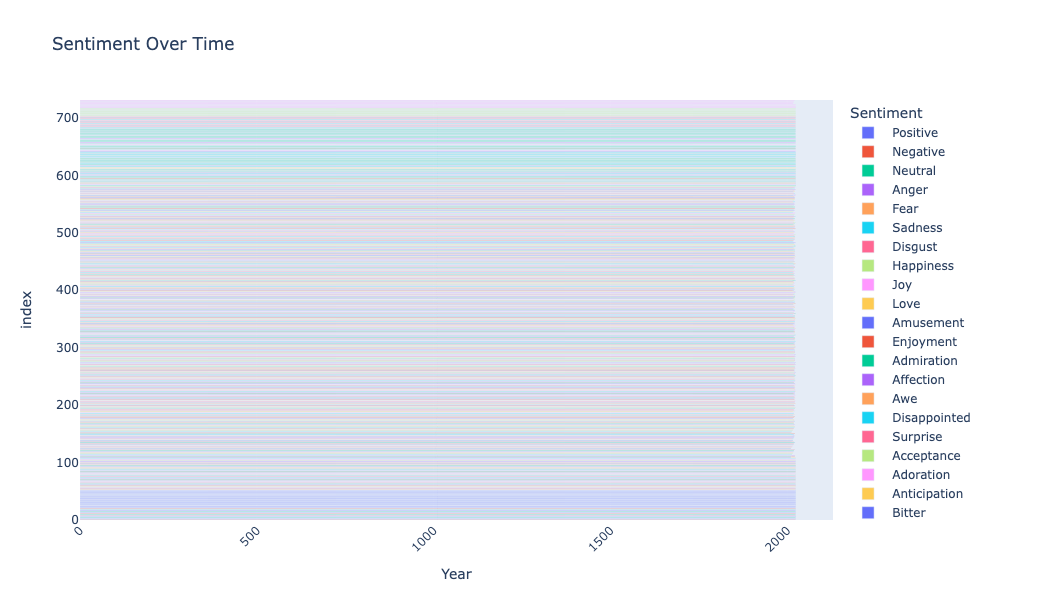

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

def plot_sentiment_over_time_interactive(df):
    df['Year'] = pd.to_datetime(df['Timestamp']).dt.year  # Extract year from Timestamp
    fig = px.bar(df, x='Year', color='Sentiment', title='Sentiment Over Time',
                 labels={'count': 'Count', 'Year': 'Year'}, height=600)
    fig.update_layout(xaxis_tickangle=-45)  # Rotate labels for better visibility
    fig.show()
# Assuming df is your DataFrame after processing
plot_sentiment_over_time_interactive(df)
def plot_sentiment_over_time(df):
    plt.figure(figsize=(10, 8))
    df['Year'] = pd.to_datetime(df['Timestamp']).dt.year  # Extract year from Timestamp
    palette = sns.color_palette("hsv", len(df['Sentiment'].unique()))  # Generates a color palette
    ax = sns.countplot(x='Year', hue='Sentiment', data=df, palette=palette)
    plt.title('Sentiment Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    # Modify the legend
    legend = plt.legend(title='Sentiment', loc='upper right', bbox_to_anchor=(1, 1))
    # Set the orientation of the items in legend to horizontal
    legend._legend_box.align = "left"
    plt.show()

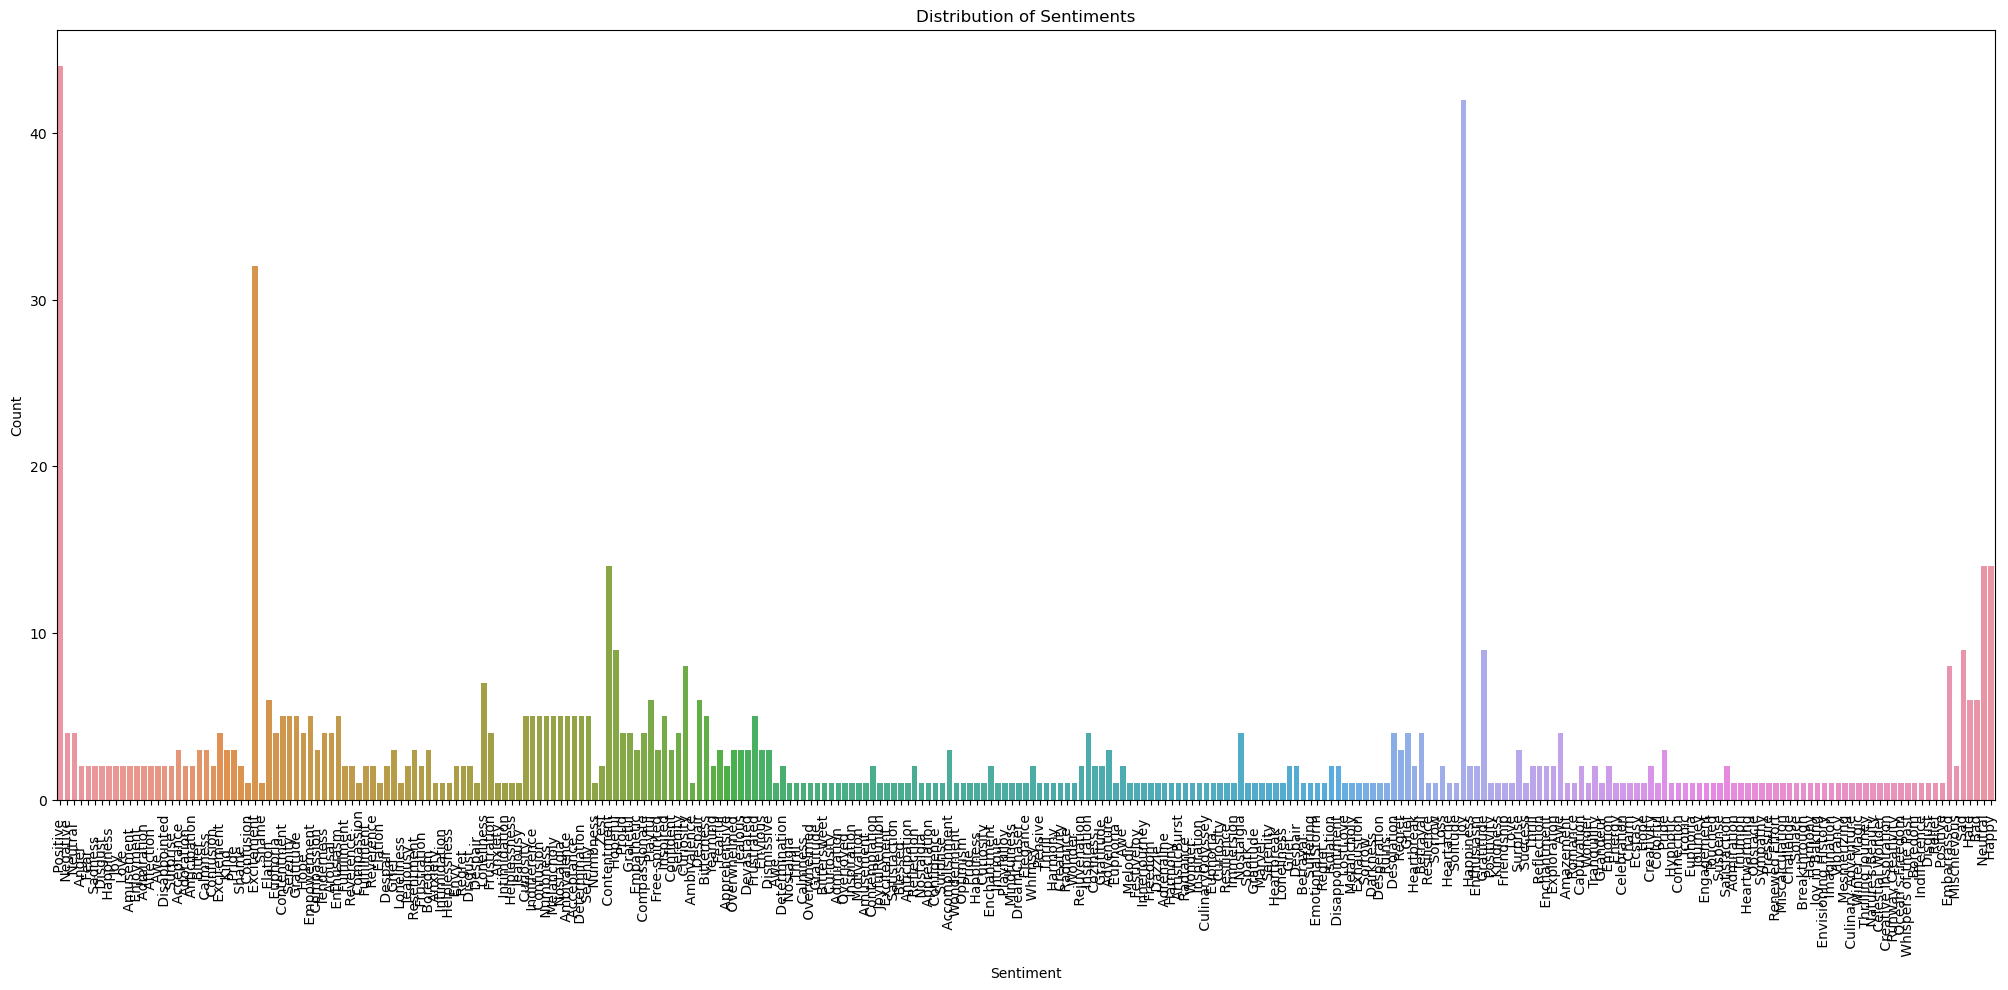

/tmp/ipykernel_5599/3959427599.py:13: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



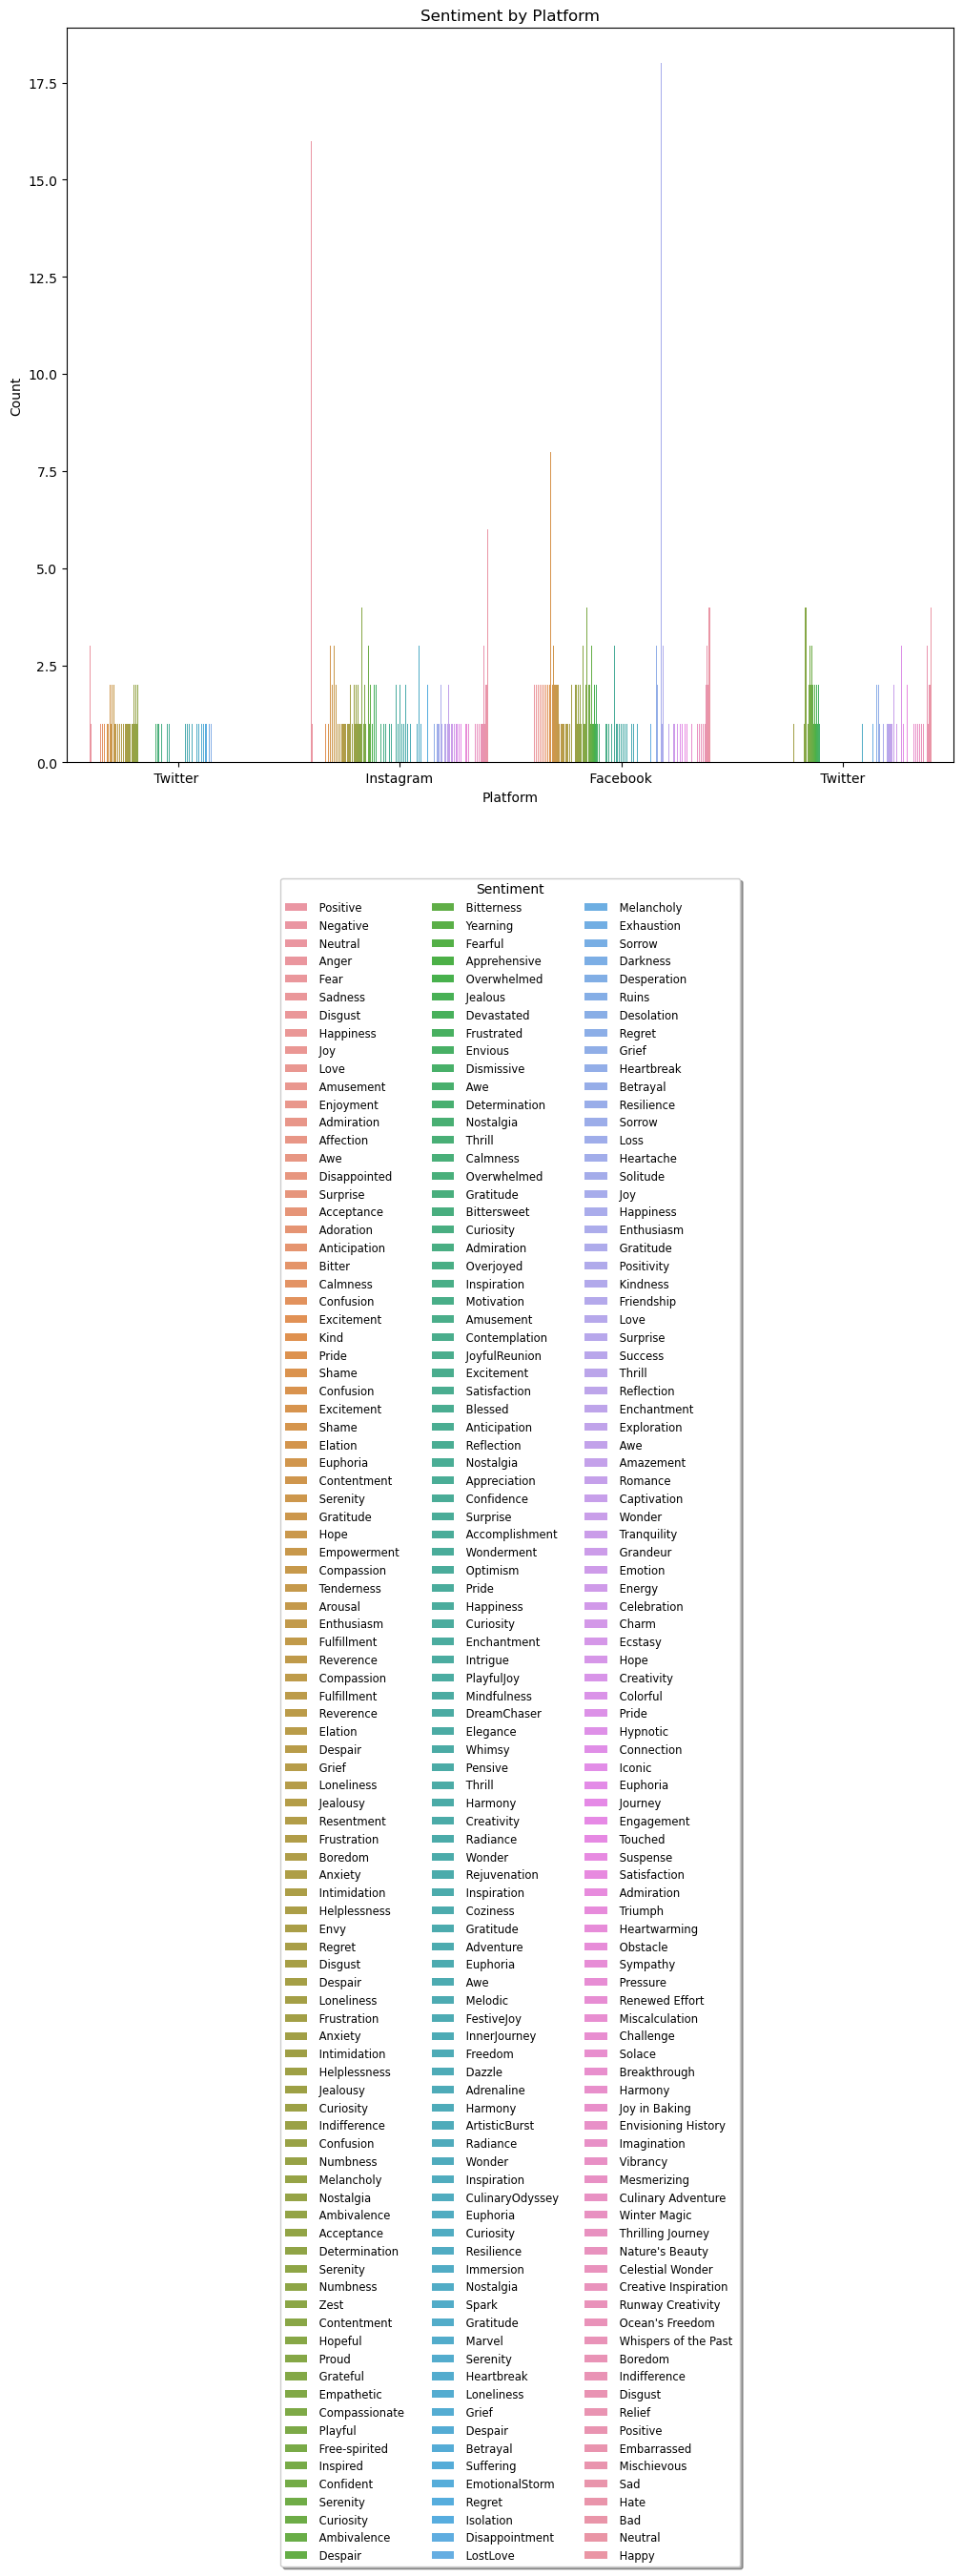

In [236]:


def plot_sentiment_by_platform_interactive(df):
    # Create the plot
    fig = px.bar(df, x='Platform', color='Sentiment', title='Sentiment by Platform',
                 labels={'count': 'Count', 'Platform': 'Platform'},
                 height=600, width=800)
    # Adjust legend orientation and position
    fig.update_layout(legend=dict(
        title='Sentiment',
        orientation='h',  # Horizontal legend
        yanchor="bottom",
        y=-0.2,  # Place legend below the x-axis
        xanchor="center",
        x=0.5
    ))

    # Show the plot
    fig.show()

# Assuming df is your DataFrame after processing
# plot_sentiment_by_platform_interactive(df)

def plot_sentiment_by_country(df):
    plt.figure(figsize=(10, 8))
    country_sentiment = df.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)
    country_sentiment.plot(kind='bar', stacked=True)
    plt.title('Sentiment by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.show()

# Run visualization functions
plot_sentiment_distribution(df)
plot_sentiment_by_platform(df)